In [1]:
# prompt: mount to colab

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
root_dir = "/content/drive/MyDrive/CSIO Contents/DBT/EDA/v2"

In [9]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
from sklearn.model_selection import train_test_split

In [103]:
import xgboost as xgb

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [136]:
from sklearn.model_selection import GridSearchCV

In [35]:
plt.style.use('ggplot')

In [4]:
os.chdir(root_dir)

In [5]:
dataset_path = "/content/drive/MyDrive/CSIO Contents/DBT/EDA/v2/lettuce_dataset.csv"

In [46]:
df = pd.read_csv(dataset_path,encoding='latin-1')

In [47]:
df

,Plant_ID,Date,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,8/3/2023,33.4,53,582,6.4,1
1,1,8/4/2023,33.5,53,451,6.1,2
2,1,8/5/2023,33.4,59,678,6.4,3
3,1,8/6/2023,33.4,68,420,6.4,4
4,1,8/7/2023,33.4,74,637,6.5,5
...,...,...,...,...,...,...,...
3164,70,9/13/2023,19.4,72,475,6.1,42
3165,70,9/14/2023,22.5,80,668,6.7,43
3166,70,9/15/2023,22.5,62,476,6.6,44
3167,70,9/16/2023,24.6,79,621,6.0,45


## Dataset Details:
1. **Plant Identifier (Plant_ID):** A unique identifier assigned to each plant.
2. **Date (Date):** The date of Observation.
3. **Temperature (°C):** The recorded temperature expressed in degrees Celsius.
4. **Humidity (%):** The percentage representing the humidity level.
5. **Total Dissolved Solids (TDS) Value (ppm):** The measurement of Total Dissolved Solids given in parts per million.
6. **pH Level:** The measurement of the environmental pH level.
7. **Growth Days:**The duration in days from the initial growth stage of the plant to its full maturity.

## EDA

In [48]:
df.describe()

,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
count,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000,3169.000000
mean,35.441780,28.142222,64.873462,598.045440,6.399211,23.140107
std,20.243433,4.670521,8.988985,115.713047,0.234418,13.075415
min,1.000000,18.000000,50.000000,400.000000,6.000000,1.000000
25%,18.000000,23.600000,57.000000,498.000000,6.200000,12.000000
50%,35.000000,30.200000,65.000000,593.000000,6.400000,23.000000
75%,53.000000,31.500000,73.000000,699.000000,6.600000,34.000000
max,70.000000,33.500000,80.000000,800.000000,6.800000,48.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1   Date              3169 non-null   object 
 2   Temperature (°C)  3169 non-null   float64
 3   Humidity (%)      3169 non-null   int64  
 4   TDS Value (ppm)   3169 non-null   int64  
 5   pH Level          3169 non-null   float64
 6   Growth Days       3169 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 173.4+ KB


In [50]:
df['Date'] = pd.to_datetime(df['Date'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Plant_ID          3169 non-null   int64         
 1   Date              3169 non-null   datetime64[ns]
 2   Temperature (°C)  3169 non-null   float64       
 3   Humidity (%)      3169 non-null   int64         
 4   TDS Value (ppm)   3169 non-null   int64         
 5   pH Level          3169 non-null   float64       
 6   Growth Days       3169 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 173.4 KB


In [52]:
# To check Is there any null values in the dataset
df.isna().sum()

,0
Plant_ID,0
Date,0
Temperature (°C),0
Humidity (%),0
TDS Value (ppm),0
pH Level,0
Growth Days,0


In [53]:
# To check the duplicate values in the dataset
df.duplicated().sum()

0

In [54]:
df

,Plant_ID,Date,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
0,1,2023-08-03,33.4,53,582,6.4,1
1,1,2023-08-04,33.5,53,451,6.1,2
2,1,2023-08-05,33.4,59,678,6.4,3
3,1,2023-08-06,33.4,68,420,6.4,4
4,1,2023-08-07,33.4,74,637,6.5,5
...,...,...,...,...,...,...,...
3164,70,2023-09-13,19.4,72,475,6.1,42
3165,70,2023-09-14,22.5,80,668,6.7,43
3166,70,2023-09-15,22.5,62,476,6.6,44
3167,70,2023-09-16,24.6,79,621,6.0,45


Removing plant_id and Date in further analysis

<Axes: xlabel='Date', ylabel='count'>

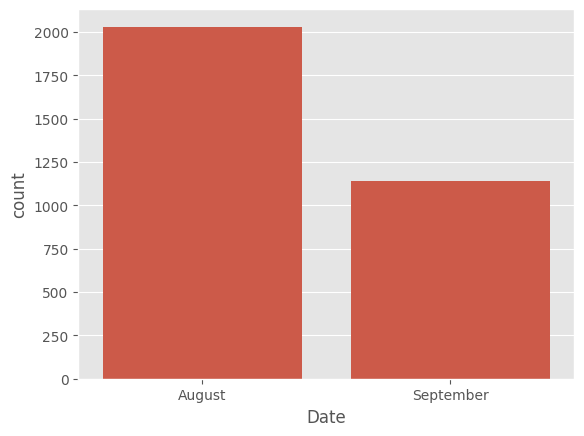

In [55]:
# Distribution of Date column by Month Wise
sns.countplot(data=df, x=df["Date"].dt.month.map({8:"August", 9:"September"}))

In [56]:
# prompt: convert Date column into index

df = df.set_index('Date')
df

,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
Date,,,,,,
2023-08-03,1,33.4,53,582,6.4,1
2023-08-04,1,33.5,53,451,6.1,2
2023-08-05,1,33.4,59,678,6.4,3
2023-08-06,1,33.4,68,420,6.4,4
2023-08-07,1,33.4,74,637,6.5,5
...,...,...,...,...,...,...
2023-09-13,70,19.4,72,475,6.1,42
2023-09-14,70,22.5,80,668,6.7,43
2023-09-15,70,22.5,62,476,6.6,44


In [57]:
# prompt: check unique values in Plant_ID	Temperature (°C)	Humidity (%)	TDS Value (ppm)	pH Level	Growth Days

# Check unique values for specified columns
columns_to_check = ['Plant_ID', 'Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']
for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"Unique values for {col}:\n{unique_values}\n")

Unique values for Plant_ID:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]

Unique values for Temperature (°C):
[33.4 33.5 32.3 22.7 31.9 30.2 30.1 29.8 29.6 30.9 30.8 30.5 31.3 31.4
 29.4 28.7 29.1 29.2 31.7 32.  32.1 31.5 20.1 31.1 31.2 30.4 30.6 29.7
 25.  31.6 18.6 22.9 24.4 18.7 24.3 22.4 23.4 19.1 21.9 21.2 24.9 18.4
 22.5 18.3 21.  23.5 20.8 22.6 19.3 23.6 19.2 21.5 24.5 23.7 18.1 18.
 19.7 23.3 21.4 23.  20.  18.2 22.1 21.6 19.4 22.3 22.  24.7 20.5 20.3
 23.8 18.8 24.8 23.9 20.9 24.6 20.4 24.2 19.8 21.7 19.6 19.  18.5 21.3
 20.2 19.5 21.8 23.2 22.8 20.7 22.2 24.1 20.6 18.9 19.9 23.1 21.1 24. ]

Unique values for Humidity (%):
[53 59 68 74 77 75 63 69 54 78 56 62 70 57 51 73 52 61 71 64 55 50 76 79
 65 58 66 72 80 67 60]

Unique values for TDS Value (ppm):
[582 451 678 420 637 478 682 576 662 607 670 535 480 688 65

In [58]:
# prompt: count of unique values

# Assuming the code you provided is already executed and 'df' DataFrame is available.

# Check unique values for specified columns and print their counts
columns_to_check = ['Plant_ID', 'Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']
for col in columns_to_check:
    unique_values = df[col].unique()
    unique_count = len(unique_values)
    print(f"Unique values for {col}: {unique_count}")

Unique values for Plant_ID: 70
Unique values for Temperature (°C): 98
Unique values for Humidity (%): 31
Unique values for TDS Value (ppm): 401
Unique values for pH Level: 9
Unique values for Growth Days: 48


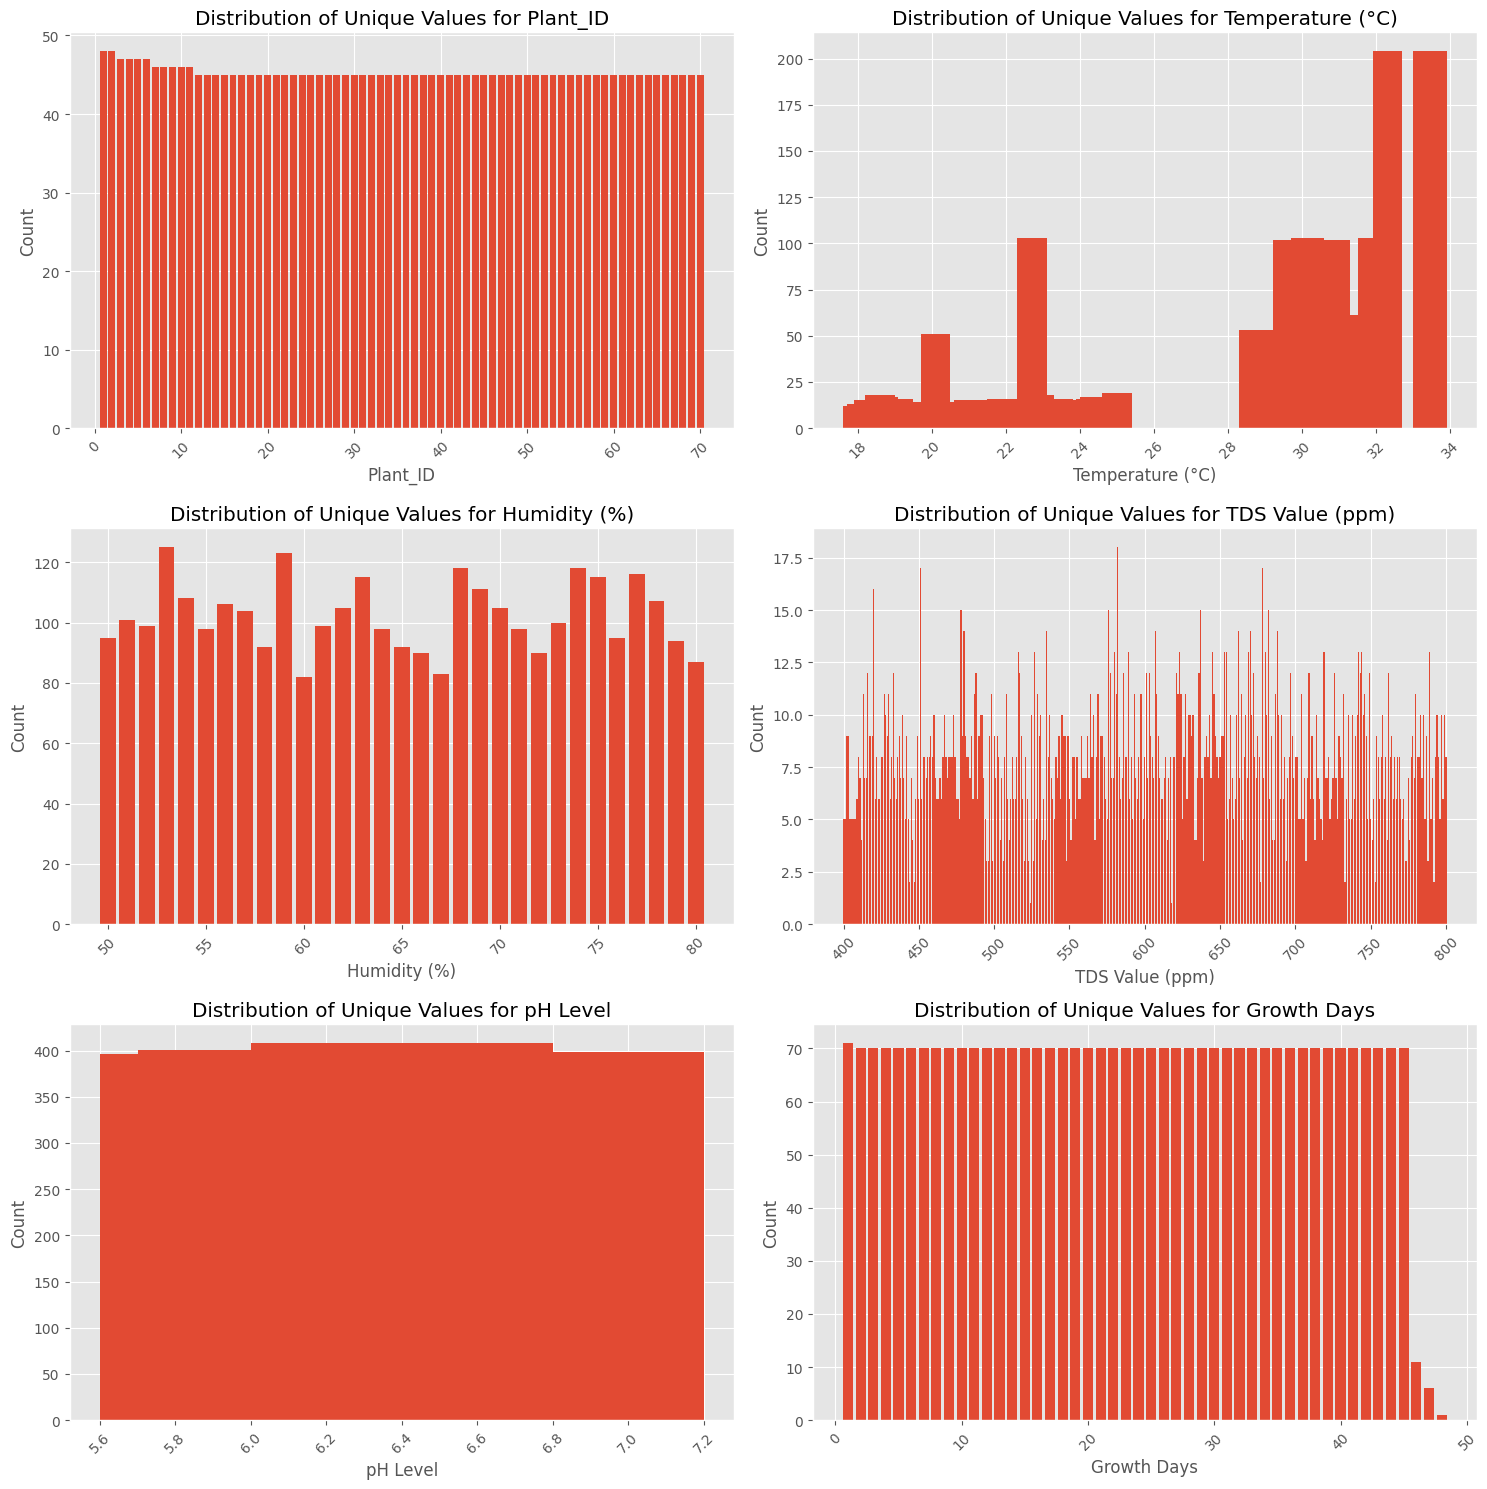

In [59]:
# Assuming the code you provided is already executed and 'df' DataFrame is available.

# Function to visualize unique values in a grid
def visualize_unique_values(df, columns_to_check):
    num_cols = len(columns_to_check)
    fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(15, 5 * ((num_cols + 1) // 2))) # Adjust figsize as needed
    axes = axes.flatten() # Flatten axes array for easier iteration

    for i, col in enumerate(columns_to_check):
        unique_values = df[col].unique()
        unique_counts = df[col].value_counts()

        axes[i].bar(unique_values, unique_counts) # Changed to bar plot
        axes[i].set_title(f"Distribution of Unique Values for {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


# Example usage:
columns_to_check = ['Plant_ID', 'Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']
visualize_unique_values(df, columns_to_check)

Lets group it by `plant_id`

In [60]:
# Group data by 'Plant_ID'
grouped_data = df.groupby('Plant_ID')

for plant_id, group_data in grouped_data:
    # print only one plant
    if plant_id in [1]:
        print(f"Plant ID: {plant_id}")
        # print the plant data upto 10 days only
        print(group_data[:10])

Plant ID: 1
            Plant_ID  Temperature (°C)  Humidity (%)  TDS Value (ppm)  \
Date                                                                    
2023-08-03         1              33.4            53              582   
2023-08-04         1              33.5            53              451   
2023-08-05         1              33.4            59              678   
2023-08-06         1              33.4            68              420   
2023-08-07         1              33.4            74              637   
2023-08-08         1              32.3            77              478   
2023-08-09         1              32.3            75              682   
2023-08-10         1              22.7            63              576   
2023-08-11         1              31.9            69              662   
2023-08-12         1              30.2            59              607   

            pH Level  Growth Days  
Date                               
2023-08-03       6.4            1  
202

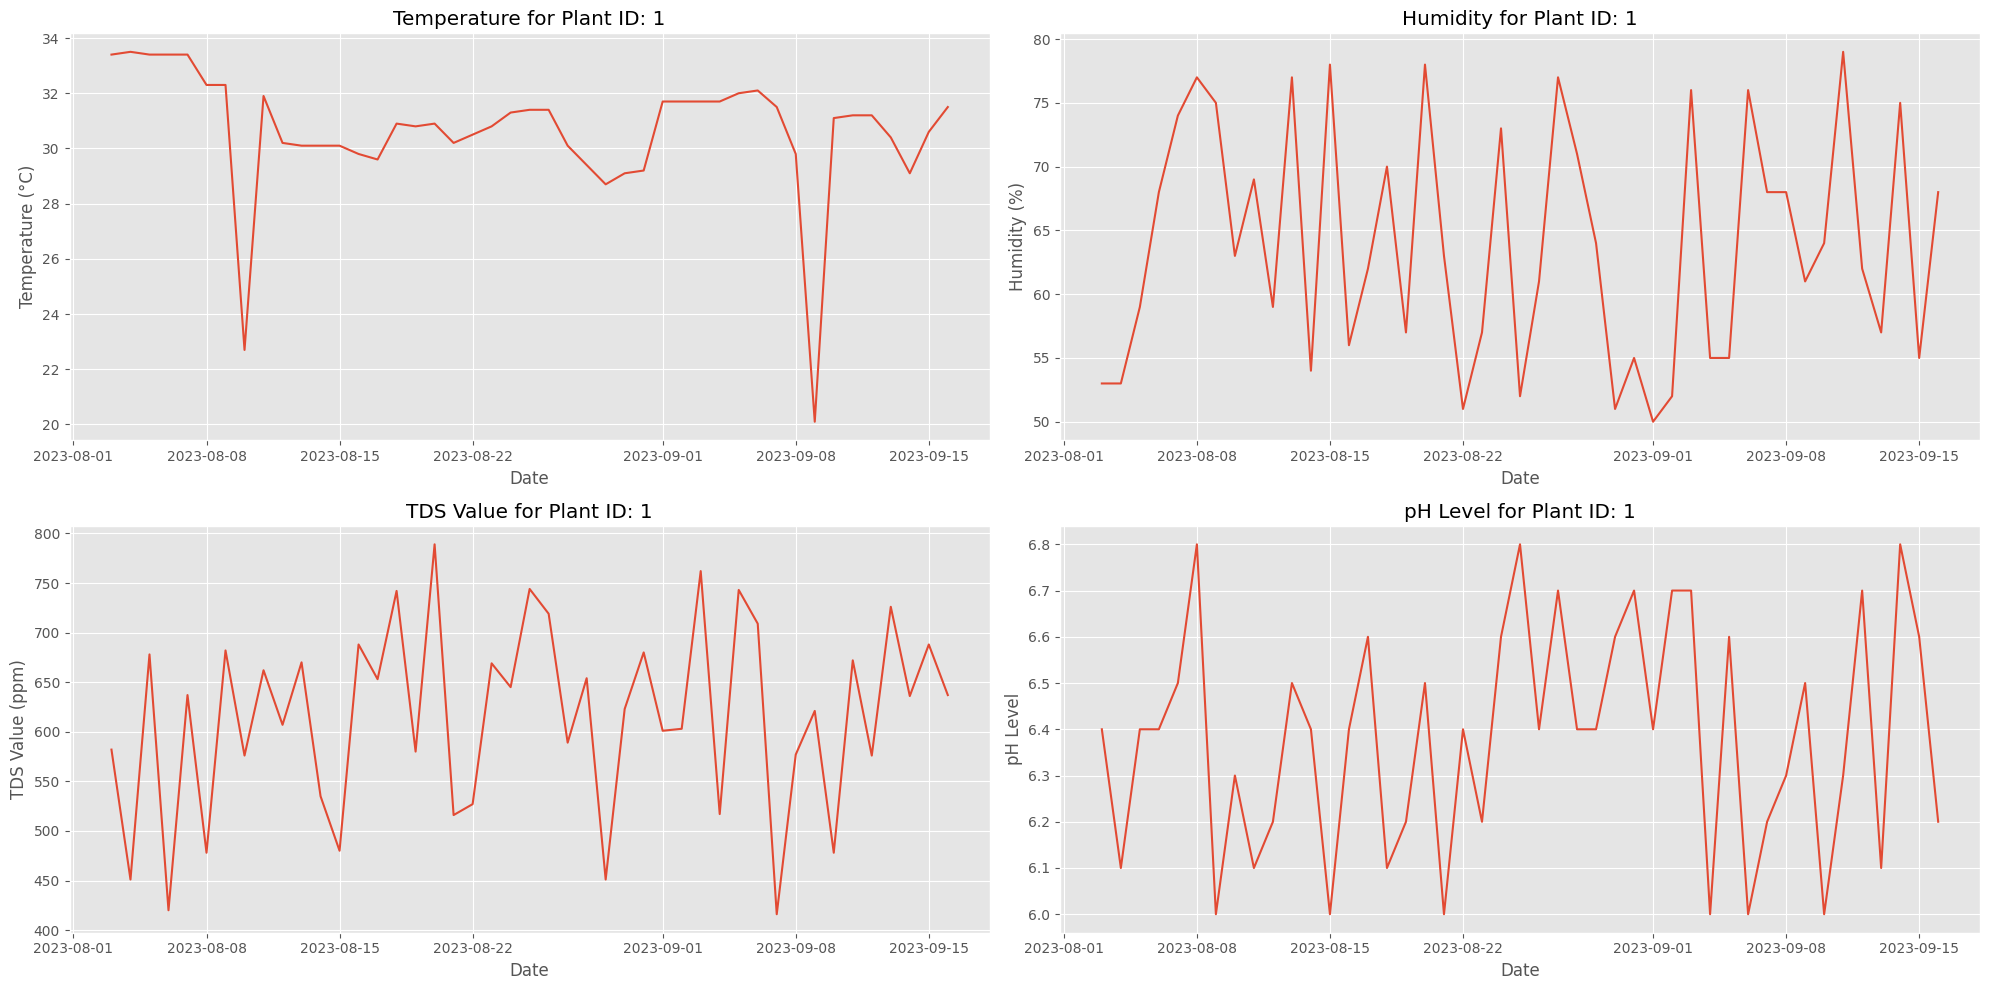

In [61]:
for plant_id, group_data in grouped_data:
    # print only one plant
    if plant_id in [1]:
        plt.figure(figsize=(20, 10))  # Adjust figure size as needed

        # Plot Temperature (°C)
        plt.subplot(2, 2, 1)
        plt.plot(group_data.index, group_data['Temperature (°C)'])
        plt.xlabel("Date")
        plt.ylabel("Temperature (°C)")
        plt.title(f"Temperature for Plant ID: {plant_id}")

        # Plot Humidity (%)
        plt.subplot(2, 2, 2)
        plt.plot(group_data.index, group_data['Humidity (%)'])
        plt.xlabel("Date")
        plt.ylabel("Humidity (%)")
        plt.title(f"Humidity for Plant ID: {plant_id}")

        # Plot TDS Value (ppm)
        plt.subplot(2, 2, 3)
        plt.plot(group_data.index, group_data['TDS Value (ppm)'])
        plt.xlabel("Date")
        plt.ylabel("TDS Value (ppm)")
        plt.title(f"TDS Value for Plant ID: {plant_id}")

        # Plot pH Level
        plt.subplot(2, 2, 4)
        plt.plot(group_data.index, group_data['pH Level'])
        plt.xlabel("Date")
        plt.ylabel("pH Level")
        plt.title(f"pH Level for Plant ID: {plant_id}")

        plt.tight_layout()  # Adjust layout to prevent overlapping
        plt.show()

In [62]:
def plot_plant_data(df, _id):
    grouped_data = df.groupby('Plant_ID')

    for plant_id, group_data in grouped_data:
        # print only one plant
        if plant_id in [_id]:
            plt.figure(figsize=(20, 10))  # Adjust figure size as needed

            # Plot Temperature (°C)
            plt.subplot(2, 2, 1)
            plt.plot(group_data.index, group_data['Temperature (°C)'])
            plt.xlabel("Date")
            plt.ylabel("Temperature (°C)")
            plt.title(f"Temperature for Plant ID: {plant_id}")

            # Plot Humidity (%)
            plt.subplot(2, 2, 2)
            plt.plot(group_data.index, group_data['Humidity (%)'])
            plt.xlabel("Date")
            plt.ylabel("Humidity (%)")
            plt.title(f"Humidity for Plant ID: {plant_id}")

            # Plot TDS Value (ppm)
            plt.subplot(2, 2, 3)
            plt.plot(group_data.index, group_data['TDS Value (ppm)'])
            plt.xlabel("Date")
            plt.ylabel("TDS Value (ppm)")
            plt.title(f"TDS Value for Plant ID: {plant_id}")

            # Plot pH Level
            plt.subplot(2, 2, 4)
            plt.plot(group_data.index, group_data['pH Level'])
            plt.xlabel("Date")
            plt.ylabel("pH Level")
            plt.title(f"pH Level for Plant ID: {plant_id}")

            plt.tight_layout()  # Adjust layout to prevent overlapping
            plt.show()

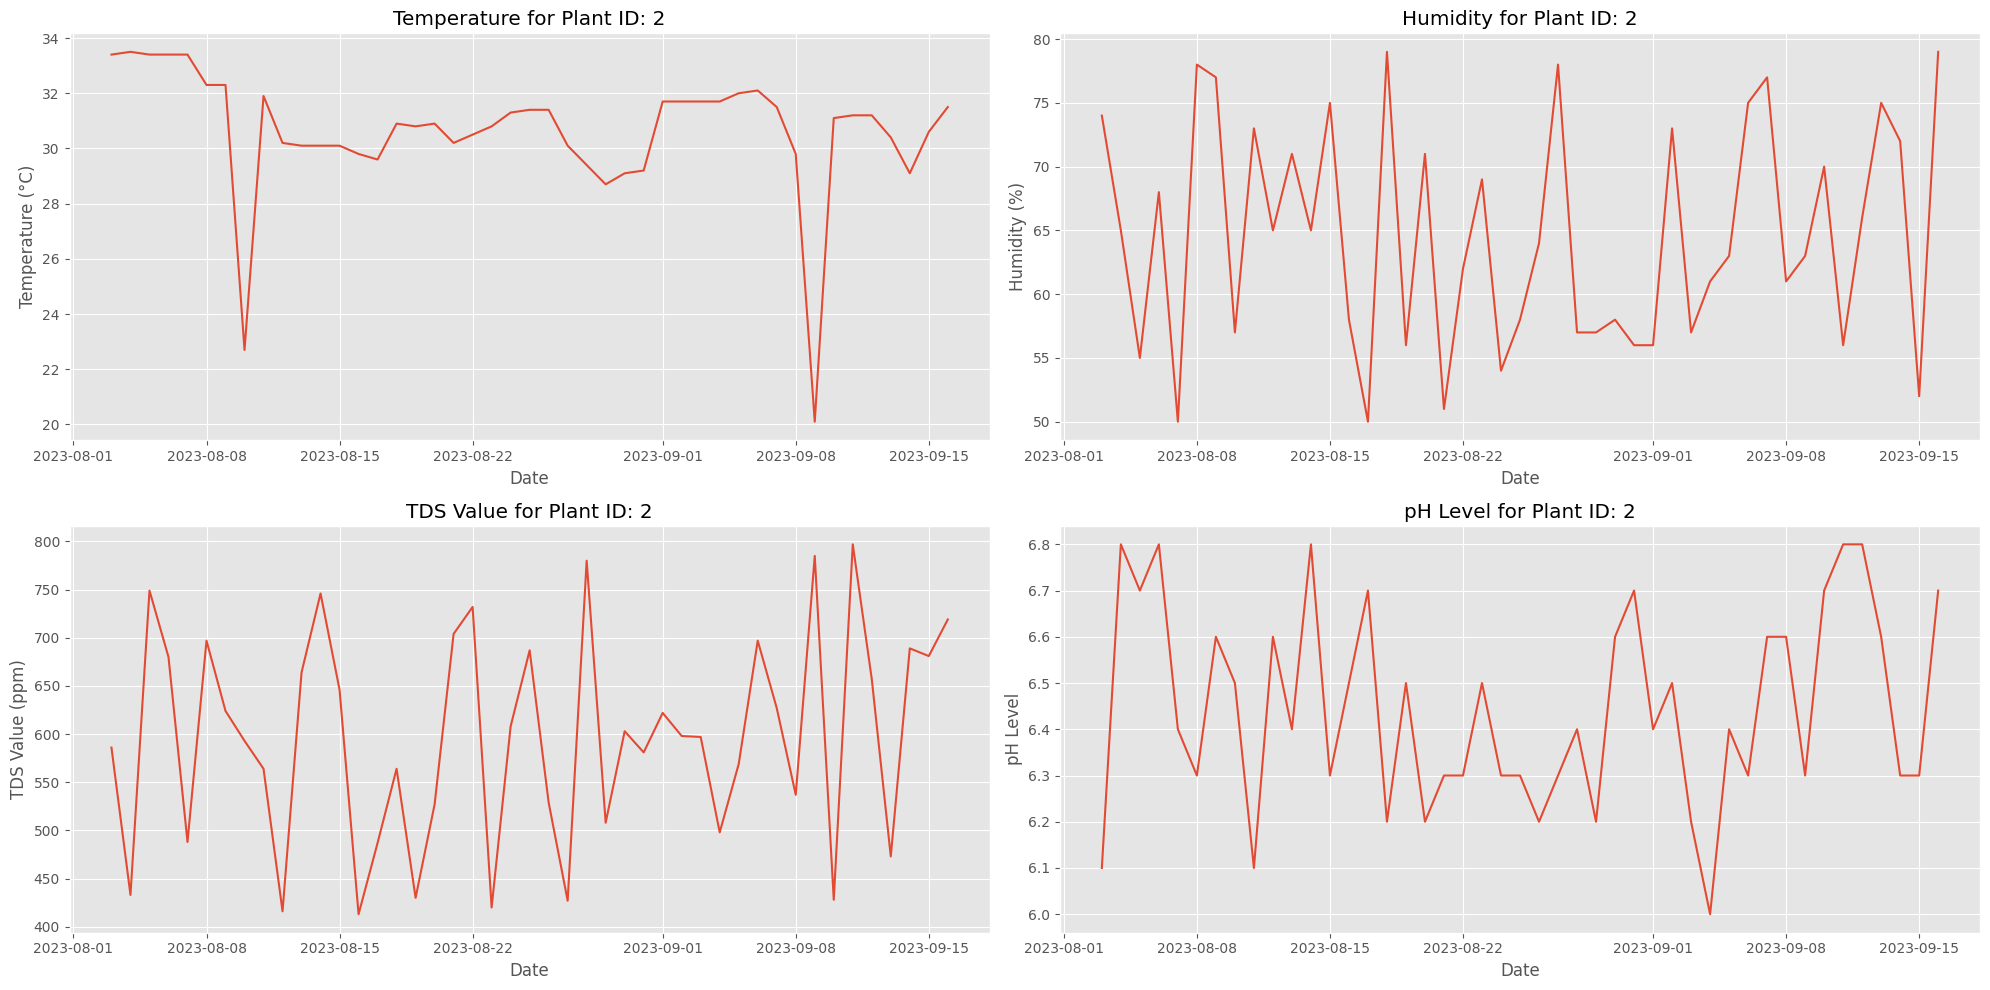

In [63]:
plot_plant_data(df, 2)

Date distribution

Clean the Dataframe

In [64]:
cleaned_df = df.drop(['Plant_ID'], axis=1)
cleaned_df

,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days
Date,,,,,
2023-08-03,33.4,53,582,6.4,1
2023-08-04,33.5,53,451,6.1,2
2023-08-05,33.4,59,678,6.4,3
2023-08-06,33.4,68,420,6.4,4
2023-08-07,33.4,74,637,6.5,5
...,...,...,...,...,...
2023-09-13,19.4,72,475,6.1,42
2023-09-14,22.5,80,668,6.7,43
2023-09-15,22.5,62,476,6.6,44


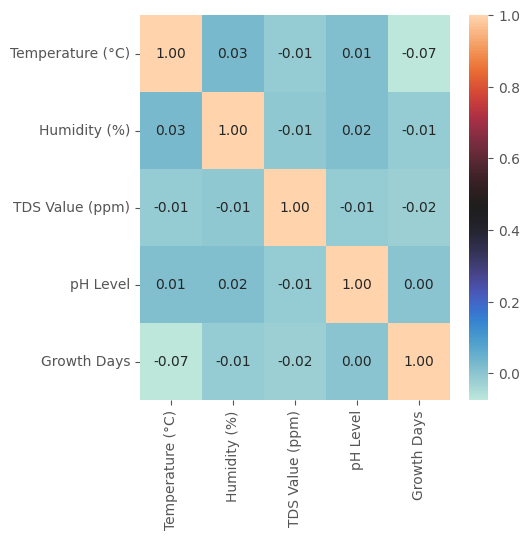

In [65]:
plt.figure(figsize=(5,5))
sns.heatmap(cleaned_df.corr(), annot=True,cmap = "icefire" ,fmt=".2f")
plt.show()

### Univariate Analysis

Univariate data refers to a type of data in which each observation or data point corresponds to a single variable. In other words, it involves the measurement or observation of a single characteristic or attribute for each individual or item in the dataset. Analyzing univariate data is the simplest form of analysis in statistics.

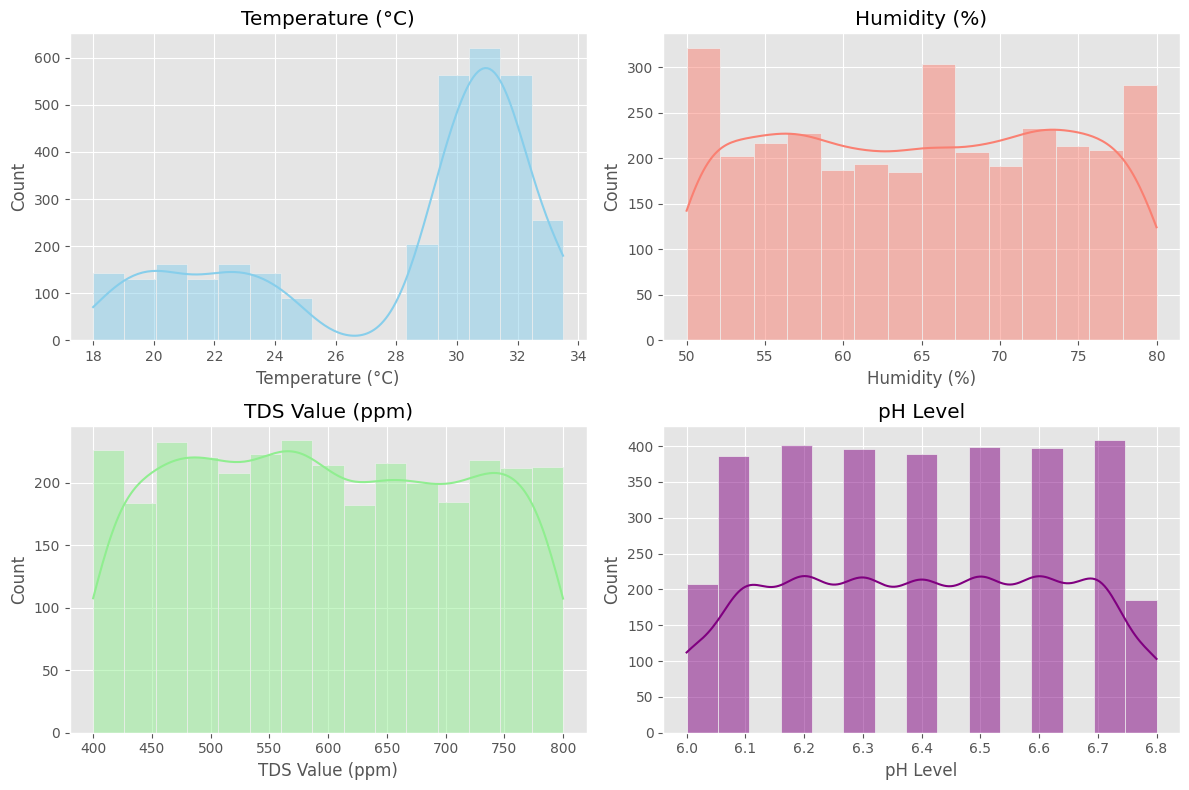

In [66]:
# prompt: plot Temperature (°C), 	Humidity (%),  TDS Value (ppm),	pH Level

# Plotting Temperature, Humidity, TDS, and pH
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Temperature (°C)'], kde=True, color='skyblue')
plt.title('Temperature (°C)')

plt.subplot(2, 2, 2)
sns.histplot(df['Humidity (%)'], kde=True, color='salmon')
plt.title('Humidity (%)')

plt.subplot(2, 2, 3)
sns.histplot(df['TDS Value (ppm)'], kde=True, color='lightgreen')
plt.title('TDS Value (ppm)')

plt.subplot(2, 2, 4)
sns.histplot(df['pH Level'], kde=True, color='purple')
plt.title('pH Level')

plt.tight_layout()
plt.show()

### Bi variate analysis

Bivariate data involves two different variables, and the analysis of this type of data focuses on understanding the relationship or association between these two variables. Example of bivariate data can be temperature and ice cream sales in summer season.

https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/

In [67]:
# Data Distribution of Growth Days vs Temperature
fig = px.scatter(cleaned_df, x="Temperature (°C)", y="Growth Days", marginal_x="histogram", marginal_y="histogram",title="Growth Days Vs Temperature", color_discrete_sequence=["red"])
fig.show()

In [75]:
def get_bivariate_analysis(df, x, y):
    # Data Distribution of Growth Days vs Temperature
    fig = px.scatter(df, x=x, y=y, marginal_x="histogram", marginal_y="histogram",title=f"{x} Vs {y}", color_discrete_sequence=["blue"])
    fig.show()

    fig = px.box(df, x=x, y=y,
                 title=f"{x} Vs {y}", color_discrete_sequence=["blue"])

    fig.show()

In [76]:
get_bivariate_analysis(cleaned_df, 'Temperature (°C)', 'Growth Days')

In [71]:
cleaned_df.columns

Index(['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level',
       'Growth Days'],
      dtype='object')

In [77]:
for _attribute in ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level']:
    get_bivariate_analysis(cleaned_df, _attribute, 'Growth Days')

In every parameter distribution is well speread, except for temperature. WHich suggests that temp has a very specific range where lettuce can grow.

In [79]:
# Correlation Analysis
correlations = cleaned_df.corr()['Growth Days'].sort_values()

In [80]:
correlations

,Growth Days
Temperature (°C),-0.074601
TDS Value (ppm),-0.020633
Humidity (%),-0.014481
pH Level,0.003023
Growth Days,1.000000


In [83]:
# Assuming 'cleaned_df' is your DataFrame and 'Growth Days' is your target variable
X = cleaned_df.drop('Growth Days', axis=1)
y = cleaned_df['Growth Days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for training and testing
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2535, 4) (634, 4) (2535,) (634,)


In [81]:
# Feature Importance using Random Forest
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [86]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [87]:
feature_importances = pd.Series(rfr.feature_importances_, index=X.columns).sort_values(ascending=False)

correlation_df = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})

feature_importances_df = pd.DataFrame({'Feature': feature_importances.index, 'Importance': feature_importances.values})

In [90]:
comparison_df = pd.DataFrame({
    'Correlation': correlations.head(4).values,
    'Importances': feature_importances.values,
    },
    index=correlations.head(4).index
)

#print("Correlation Values: \n",correlation_df)
#print("Feature Importances: \n",feature_importances_df)

comparison_df

,Correlation,Importances
Temperature (°C),-0.074601,0.717902
TDS Value (ppm),-0.020633,0.137508
Humidity (%),-0.014481,0.089873
pH Level,0.003023,0.054717


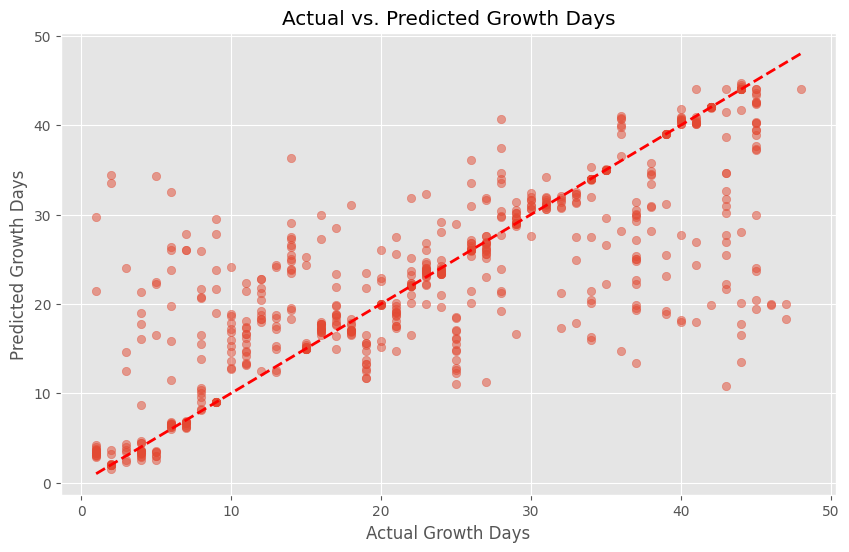

In [92]:
# Predict on the test set
y_pred = rfr.predict(X_test)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2) # Add a diagonal line for reference
plt.xlabel('Actual Growth Days')
plt.ylabel('Predicted Growth Days')
plt.title('Actual vs. Predicted Growth Days')
plt.grid(True)
plt.show()

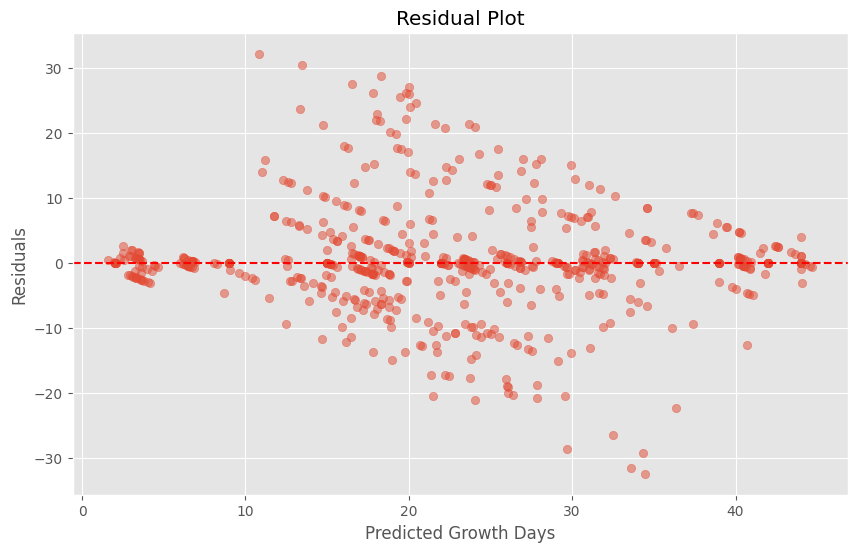

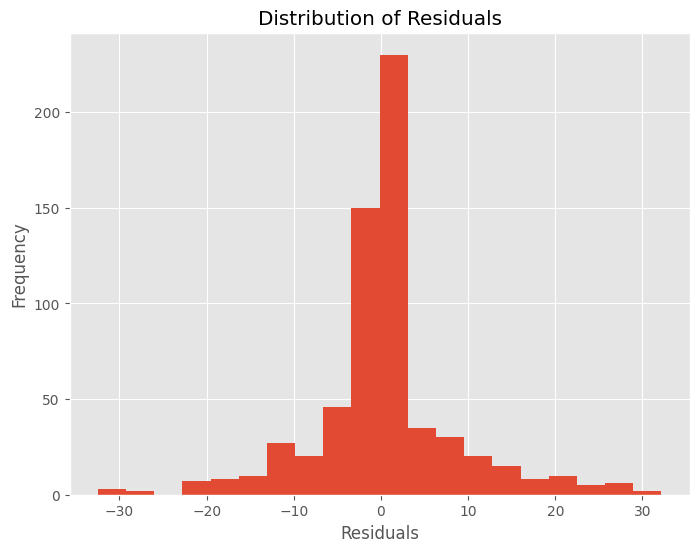

In [93]:

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at zero
plt.xlabel('Predicted Growth Days')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


# Distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [94]:

# Calculate evaluation metrics (example: R-squared)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.6043314938001365


## Lagged features

In [117]:
def create_lagged_features(df):
# Creating lagged features for Temperature, Humidity, pH Level, and TDS Value
    lag_features = ['Temperature (°C)', 'Humidity (%)', 'pH Level', 'TDS Value (ppm)']
    lags = [1, 2, 3, 7]  # Lags of 1 day, 2 days, 3 days, and 7 days

    for feature in lag_features:
        for lag in lags:
            df[f"{feature} Lag {lag}"] = df[feature].shift(lag)

    # Rolling window statistics for the same features
    window = 7  # 7-day window
    for feature in lag_features:
        df[f"{feature} Rolling Mean"] = df[feature].rolling(window=window).mean()
        df[f"{feature} Rolling Std"] = df[feature].rolling(window=window).std()

    # Time-based features
    df['Day of Week'] = df.index.dayofweek + 1
    df['Month'] = df.index.month



In [118]:
lagged_df = create_lagged_features(cleaned_df)

<ipython-input-117-6c60c1a4b886>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-6c60c1a4b886>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-6c60c1a4b886>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-6

In [119]:
lagged_df

In [120]:
cleaned_df

,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days,Temperature (°C) Lag 1,Temperature (°C) Lag 2,Temperature (°C) Lag 3,Temperature (°C) Lag 7,Humidity (%) Lag 1,...,Temperature (°C) Rolling Mean,Temperature (°C) Rolling Std,Humidity (%) Rolling Mean,Humidity (%) Rolling Std,pH Level Rolling Mean,pH Level Rolling Std,TDS Value (ppm) Rolling Mean,TDS Value (ppm) Rolling Std,Day of Week,Month
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-10,22.7,63,576,6.3,8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,8
2023-08-11,31.9,69,662,6.1,9,22.7,NaN,NaN,NaN,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,8
2023-08-12,30.2,59,607,6.2,10,31.9,22.7,NaN,NaN,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,8
2023-08-13,30.1,77,670,6.5,11,30.2,31.9,22.7,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,8
2023-08-14,30.1,54,535,6.4,12,30.1,30.2,31.9,NaN,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13,19.4,72,475,6.1,42,22.6,21.2,24.6,20.3,58.0,...,22.500000,1.903506,68.000000,9.848858,6.371429,0.298408,555.000000,130.472219,3,9
2023-09-14,22.5,80,668,6.7,43,19.4,22.6,21.2,24.5,72.0,...,22.214286,1.691576,68.142857,10.040395,6.400000,0.321455,572.000000,137.142262,4,9
2023-09-15,22.5,62,476,6.6,44,22.5,19.4,22.6,23.6,80.0,...,22.057143,1.589399,69.285714,8.499300,6.471429,0.298408,547.285714,136.540244,5,9


In [121]:
cleaned_df = cleaned_df.dropna()


In [122]:
cleaned_df

,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days,Temperature (°C) Lag 1,Temperature (°C) Lag 2,Temperature (°C) Lag 3,Temperature (°C) Lag 7,Humidity (%) Lag 1,...,Temperature (°C) Rolling Mean,Temperature (°C) Rolling Std,Humidity (%) Rolling Mean,Humidity (%) Rolling Std,pH Level Rolling Mean,pH Level Rolling Std,TDS Value (ppm) Rolling Mean,TDS Value (ppm) Rolling Std,Day of Week,Month
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-17,29.6,62,653,6.6,15,29.8,30.1,30.1,22.7,56.0,...,30.257143,0.754668,65.000000,9.797959,6.314286,0.219306,613.571429,78.189635,4,8
2023-08-18,30.9,70,742,6.1,16,29.6,29.8,30.1,31.9,62.0,...,30.114286,0.405909,65.142857,9.873003,6.314286,0.219306,625.000000,91.210380,5,8
2023-08-19,30.8,57,580,6.2,17,30.9,29.6,29.8,30.2,70.0,...,30.200000,0.483046,64.857143,10.106575,6.314286,0.219306,621.142857,92.657845,6,8
2023-08-20,30.9,78,789,6.5,18,30.8,30.9,29.6,30.1,57.0,...,30.314286,0.545981,65.000000,10.311806,6.314286,0.219306,638.142857,112.011054,7,8
2023-08-21,30.2,63,516,6.0,19,30.9,30.8,30.9,30.1,78.0,...,30.328571,0.540723,66.285714,9.214378,6.257143,0.243975,635.428571,115.114229,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13,19.4,72,475,6.1,42,22.6,21.2,24.6,20.3,58.0,...,22.500000,1.903506,68.000000,9.848858,6.371429,0.298408,555.000000,130.472219,3,9
2023-09-14,22.5,80,668,6.7,43,19.4,22.6,21.2,24.5,72.0,...,22.214286,1.691576,68.142857,10.040395,6.400000,0.321455,572.000000,137.142262,4,9
2023-09-15,22.5,62,476,6.6,44,22.5,19.4,22.6,23.6,80.0,...,22.057143,1.589399,69.285714,8.499300,6.471429,0.298408,547.285714,136.540244,5,9


## XGboost

In [128]:
# Splitting the data into training and testing sets (80% train, 20% test)
X = cleaned_df.drop(['Growth Days'], axis=1)
y = cleaned_df['Growth Days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
xgbr = xgb.XGBRegressor()

In [130]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [131]:
# Predicting on the test set
y_pred = xgbr.predict(X_test)

In [132]:
# Evaluate model's performance
def evaluate_performance(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print('Mean Absolute Error: ', mae)
    print('Mean Squared Error: ', mse)
    print('Root Mean Squared Error: ', rmse)
    print('R2 Score: ', r2)


evaluate_performance(y_test, y_pred)

Mean Absolute Error:  1.7168745799034408
Mean Squared Error:  13.872869633067465
Root Mean Squared Error:  3.724630133727034
R2 Score:  0.9152135848999023


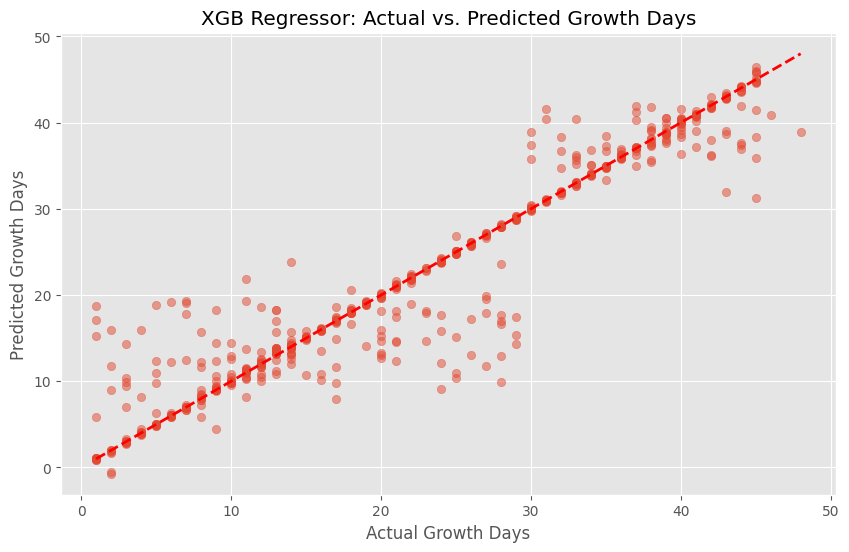

In [133]:
# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2) # Add a diagonal line for reference
plt.xlabel('Actual Growth Days')
plt.ylabel('Predicted Growth Days')
plt.title('XGB Regressor: Actual vs. Predicted Growth Days')
plt.grid(True)
plt.show()

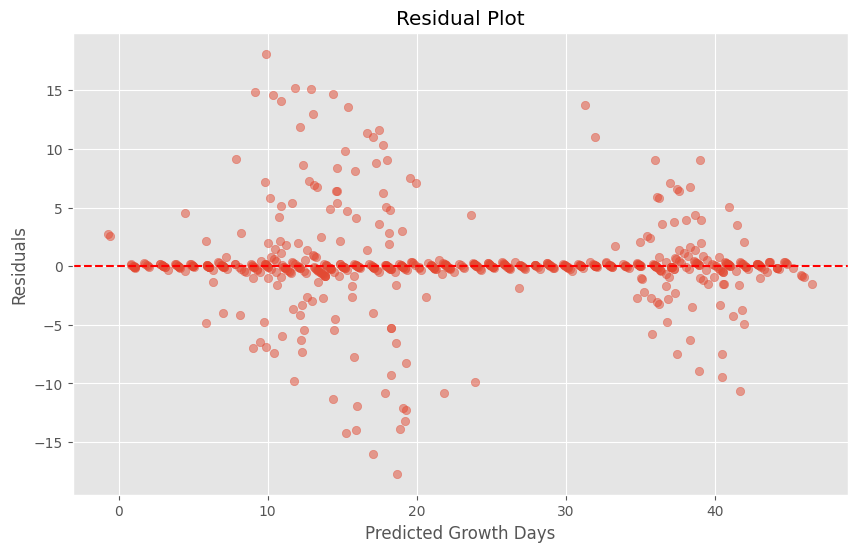

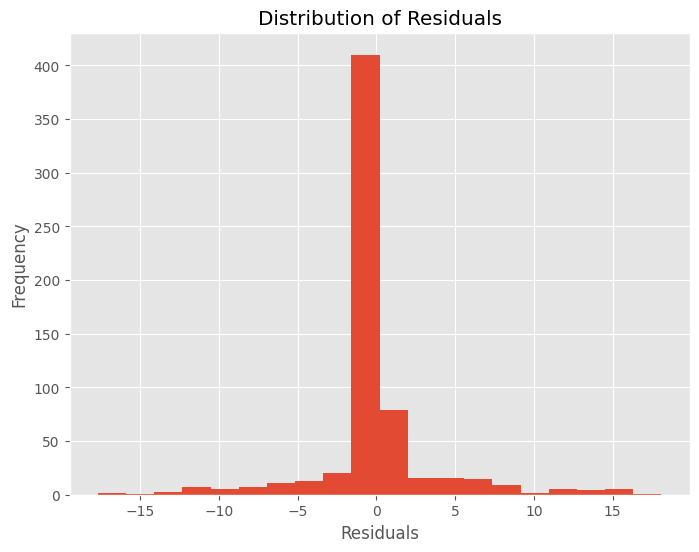

In [134]:

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at zero
plt.xlabel('Predicted Growth Days')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


# Distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [139]:
pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred
}).reset_index(drop=True)

,Actual Values,Predicted Values
0,32,36.767933
1,20,15.306405
2,30,38.922138
3,5,12.307741
4,17,17.016529
...,...,...
626,16,13.554921
627,17,17.042978
628,36,35.966438
629,42,36.088455


In [140]:
# Defining the hyperparameters grid to search
param_grid = {
    'n_estimators': [1700, 2000, 2300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [9],
    'subsample': [0.9, 1, 1.2],
    'colsample_bytree': [1, 2]
}


In [ ]:
# Initializing GridSearchCV with 3-fold cross validation
grid_search = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


72 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1108, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1, 2],
                         'learning_rate': [0.01, 0.1], 'max_depth': [9],
                         'n_estimators': [1700, 2000, 2300],
                         'subsample': [0.9, 1, 1.2]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Getting the best parameters
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 9,
 'n_estimators': 2300,
 'subsample': 0.9}

In [ ]:
# Training the XGBoost regressor with the best hyperparameters
best_model = xgb.XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_best = best_model.predict(X_test)

# Evaluating the model
evaluate_performance(y_test, y_pred_best)

Mean Absolute Error:  1.4959306612067669
Mean Squared Error:  11.480541680436039
Root Mean Squared Error:  3.388294804239448
R2 Score:  0.9298347234725952


In [ ]:
pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_best
}).reset_index(drop=True)

,Actual Values,Predicted Values
0,32,36.721642
1,20,16.356375
2,30,39.780083
3,5,13.179798
4,17,16.998758
...,...,...
626,16,12.563442
627,17,17.027542
628,36,37.344116
629,42,37.361198


In [ ]:
import pickle

In [ ]:
file_name = "xgb_reg.pkl"

In [ ]:
file_name = "best_xgb_reg.pkl"


In [ ]:
pickle.dump(best_model, open(os.path.join(root_dir, file_name), "wb"))